In [1]:
from path import Path
import numpy as np
import pandas as pd


data = Path("../apestogetherstrong/logistic_regression_test.csv")
df = pd.read_csv(data)
df.head()

,data_index,symbol,date,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,volume_negativeIncrease_up,volume_positiveIncrease_up,...,hospitalizedIncrease_greater_previousday,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday
0,0,A,8/20/2020,318382,1651518,0,0,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
1,1,AA,8/20/2020,1543881,5460701,0,0,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
2,2,AAAU,8/20/2020,151621,584100,0,0,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
3,3,AACG,8/20/2020,10963,36708,0,0,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
4,4,AADR,8/20/2020,177,1191,0,0,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 42 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   data_index                                    623468 non-null  int64  
 1   symbol                                        623468 non-null  object 
 2   date                                          623468 non-null  object 
 3   volume                                        623468 non-null  int64  
 4   volume_previousday                            623468 non-null  int64  
 5   volume_greater_previousday                    623468 non-null  int64  
 6   volume_deathIncrease_up                       623468 non-null  int64  
 7   volume_hospitalizedIncrease_up                623468 non-null  int64  
 8   volume_negativeIncrease_up                    623468 non-null  int64  
 9   volume_positiveIncrease_up                    62

In [3]:
rf_df = pd.DataFrame().assign(symbol=df['symbol'],date=df['date'],high=df['high'],iexClose=df['iexClose'],deathIncrease=df['deathIncrease'],negativeIncrease=df['negativeIncrease'],positiveIncrease=df['positiveIncrease'],totalTestResultsIncrease=df['totalTestResultsIncrease'],iexClose_deathIncrease_up=df['iexClose_deathIncrease_up'])
print(rf_df)

       symbol        date    high  iexClose  deathIncrease  negativeIncrease  \
0           A   8/20/2020  98.150    98.065           1129            208472   
1          AA   8/20/2020  15.120    14.965           1129            208472   
2        AAAU   8/20/2020  19.440    19.400           1129            208472   
3        AACG   8/20/2020   1.126     1.190           1129            208472   
4        AADR   8/20/2020  56.330    58.260           1129            208472   
...       ...         ...     ...       ...            ...               ...   
623463    ZVO  12/23/2020   4.270     4.130           3393            304962   
623464   ZYME  12/23/2020  53.700    51.030           3393            304962   
623465   ZYNE  12/23/2020   3.505     3.415           3393            304962   
623466   ZYXI  12/23/2020  14.490    13.820           3393            304962   
623467   TRUE  12/23/2020   4.610     4.505           3393            304962   

        positiveIncrease  totalTestResu

In [4]:
float or np.ndarray(dtype=float)
rf_df['date'] = pd.to_datetime(rf_df['date'])    
rf_df['date_delta'] = (rf_df['date'] - rf_df['date'].min())  / np.timedelta64(1,'D')
# converting to object
rf_df = rf_df.astype({"date":'int64'}) 

C:\Users\andca\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """


In [5]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   symbol                     623468 non-null  object 
 1   date                       623468 non-null  int64  
 2   high                       623468 non-null  float64
 3   iexClose                   623468 non-null  float64
 4   deathIncrease              623468 non-null  int64  
 5   negativeIncrease           623468 non-null  int64  
 6   positiveIncrease           623468 non-null  int64  
 7   totalTestResultsIncrease   623468 non-null  int64  
 8   iexClose_deathIncrease_up  623468 non-null  int64  
 9   date_delta                 623468 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 47.6+ MB


In [6]:
rf_df = rf_df.drop(labels=["symbol", "date"], axis=1)
rf_df.head()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,iexClose_deathIncrease_up,date_delta
0,98.150,98.065,1129,208472,43844,864210,0,0.0
1,15.120,14.965,1129,208472,43844,864210,0,0.0
2,19.440,19.400,1129,208472,43844,864210,0,0.0
3,1.126,1.190,1129,208472,43844,864210,0,0.0
4,56.330,58.260,1129,208472,43844,864210,0,0.0


In [7]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   high                       623468 non-null  float64
 1   iexClose                   623468 non-null  float64
 2   deathIncrease              623468 non-null  int64  
 3   negativeIncrease           623468 non-null  int64  
 4   positiveIncrease           623468 non-null  int64  
 5   totalTestResultsIncrease   623468 non-null  int64  
 6   iexClose_deathIncrease_up  623468 non-null  int64  
 7   date_delta                 623468 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 38.1 MB


In [8]:
# Create our features
#X = pd.get_dummies(df_equities, columns=["death", "deathIncrease", "hospitalizedIncrease", "hospitalizedCurrently", "negative", "positive", "totalTestResults", "totalTestResultsIncrease"])
X = rf_df.drop('iexClose_deathIncrease_up',axis=1)
# Create our target
y = pd.DataFrame(rf_df["iexClose_deathIncrease_up"])
X.head()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,date_delta
0,98.150,98.065,1129,208472,43844,864210,0.0
1,15.120,14.965,1129,208472,43844,864210,0.0
2,19.440,19.400,1129,208472,43844,864210,0.0
3,1.126,1.190,1129,208472,43844,864210,0.0
4,56.330,58.260,1129,208472,43844,864210,0.0


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   high                      623468 non-null  float64
 1   iexClose                  623468 non-null  float64
 2   deathIncrease             623468 non-null  int64  
 3   negativeIncrease          623468 non-null  int64  
 4   positiveIncrease          623468 non-null  int64  
 5   totalTestResultsIncrease  623468 non-null  int64  
 6   date_delta                623468 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 33.3 MB


In [10]:
X.describe()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,date_delta
count,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,6.234680e+05,623468.000000
mean,41.163351,42.778524,1273.873418,250270.392405,100151.316456,1.282244e+06,62.164557
std,103.949506,104.890778,806.655191,124994.255672,68173.329913,4.011269e+05,35.269849
min,0.000000,0.007000,246.000000,-658774.000000,22310.000000,5.468590e+05,0.000000
25%,7.580000,9.180000,847.000000,211097.000000,43642.000000,9.504830e+05,33.000000
50%,21.680000,22.920000,1047.000000,263255.000000,63430.000000,1.182695e+06,61.000000
75%,42.739250,44.160000,1358.000000,304962.000000,166503.000000,1.653269e+06,91.000000
max,4530.000000,4474.000000,3453.000000,456078.000000,236933.000000,2.010951e+06,125.000000


In [11]:
# Check the balance of our target values
y['iexClose_deathIncrease_up'].value_counts()

0    480449
1    143019
Name: iexClose_deathIncrease_up, dtype: int64

In [12]:
# Check the balance of our target values
y['iexClose_deathIncrease_up'].value_counts(normalize=True)

0    0.770607
1    0.229393
Name: iexClose_deathIncrease_up, dtype: float64

C:\Users\andca\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\andca\anaconda3\envs\PythonData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


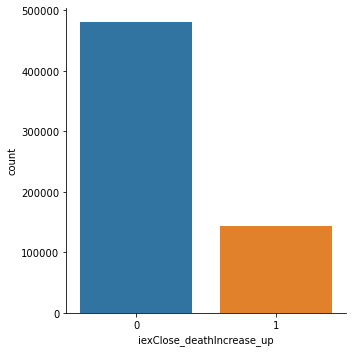

In [13]:
import seaborn as sn
sn.factorplot('iexClose_deathIncrease_up', data=y,kind='count')

In [15]:
from sklearn.model_selection import train_test_split
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [19]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
X_train_scaled[:7]

array([[-0.01534681, -0.0353423 ,  0.7885528 ,  1.58909878,  1.42356775,
         1.80161185,  0.84638296],
       [-0.35777131, -0.37087579, -0.29593026, -0.31583951, -1.01878864,
        -1.21137042, -1.39297013],
       [ 0.18085679,  0.1634906 , -0.1397647 , -0.44013017, -0.92022715,
        -1.14845564, -1.1662002 ],
       [-0.3661814 , -0.37863051, -0.36533718, -1.95644723, -0.65732805,
        -0.14131816, -0.37250543],
       [-0.25393536, -0.26817304, -0.14844057,  0.41802818,  0.27731184,
         0.69530881,  0.42118933],
       [-0.39313192, -0.35163084,  0.0213585 ,  0.14927013,  1.19961504,
         0.92514966,  1.32826907],
       [-0.12506027, -0.13965274, -0.82639741, -0.0075958 ,  0.73137828,
         0.5047897 ,  0.73299799]])

In [21]:
X_test_scaled[:7]

array([[-0.14528272, -0.15851941, -1.02966052,  0.77995601, -0.62297308,
        -0.45204836, -0.06069678],
       [-0.20820549, -0.222023  , -0.27609971, -0.39253684, -0.5466059 ,
        -0.56381931, -0.00400429],
       [-0.03847456, -0.05463453, -0.32071845, -0.04428517, -0.8129669 ,
        -0.85883329, -1.13785396],
       [-0.24700659, -0.2598509 , -0.14596175, -0.21248092, -0.88924607,
        -0.66990948, -0.79769906],
       [ 0.07262465,  0.05289128, -0.1794258 , -0.33693228, -0.82549428,
        -1.0417074 , -1.76147128],
       [ 0.84835997,  0.81313753, -0.40499827, -0.35121109, -0.03192686,
         0.35148104,  0.25111188],
       [ 0.27403677,  0.27134741, -0.51034806, -0.28581144, -0.7979751 ,
        -0.66092343, -0.57092913]])

In [22]:
print(np.mean(X_train_scaled[:,0]))
print(np.std(X_train_scaled[:,0]))

1.1077133941131842e-16
0.9999999999999998


In [23]:
print(np.mean(X_test_scaled[:,0]))
print(np.std(X_test_scaled[:,0]))

0.001051985717026859
0.9734799587348847


In [24]:
from sklearn.svm import SVC
model = SVC(kernel='linear')


In [ ]:
import warnings
warnings.filterwarnings('ignore')
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))